In [159]:
library(dplyr)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(vroom)
library(ggpubr)
library(patchwork)
library(reshape2)
library(wesanderson)
library(cowplot)

In [53]:
getwd()

[1] "/mnt/78cc8f10-85a5-4702-b307-bbcbc042e850/EarlyErad/Figures_codes/Figure9"

In [223]:
data_10 <- read.csv('fi10_mic_reg_pgnm_ed.csv')
data_30 <- read.csv('fi30_mic_reg_pgnm_ed.csv')[,-1]

In [160]:
pgnm_f10 <-  read.csv('fi10_mic_reg_pgnm_ed.csv')%>% 
arrange(desc(Importance)) %>% 
group_by(Pangenome) %>% 
select(Pangenome) %>% 
tally()

df10 <- data.frame(t(pgnm_f10)) 
colnames(df10) <- as.character(df10[1, ])
df10 <- (df10[-1,]) 
rownames(df10) = 'nPSC'
df10

,Cloud Genes,Core,Shell Genes,Soft Core
,<chr>,<chr>,<chr>,<chr>
nPSC,7,70,23,40


In [161]:
pgnm_f30 <- read.csv('fi30_mic_reg_pgnm_ed.csv')[,-1]%>% 
arrange(desc(Importance)) %>%
group_by(Pangenome) %>% 
select(Pangenome) %>% 
tally()

df30 <- data.frame(t(pgnm_f30)) 
colnames(df30) <- as.character(df30[1, ])
df30 <- (df30[-1,]) 
rownames(df30) = 'PSC'
df30

,Cloud Genes,Core,Shell Genes,Soft Core
,<chr>,<chr>,<chr>,<chr>
PSC,15,75,46,44


In [ ]:
### Pangenome Location

Var1,Var2,value,freqs
<fct>,<fct>,<dbl>,<dbl>
Cloud Genes,PSC,15,0.08333333
Core,PSC,75,0.41666667
Shell Genes,PSC,46,0.25555556
Soft Core,PSC,44,0.24444444
Cloud Genes,nPSC,7,0.05000000
Core,nPSC,70,0.50000000
Shell Genes,nPSC,23,0.16428571
Soft Core,nPSC,40,0.28571429


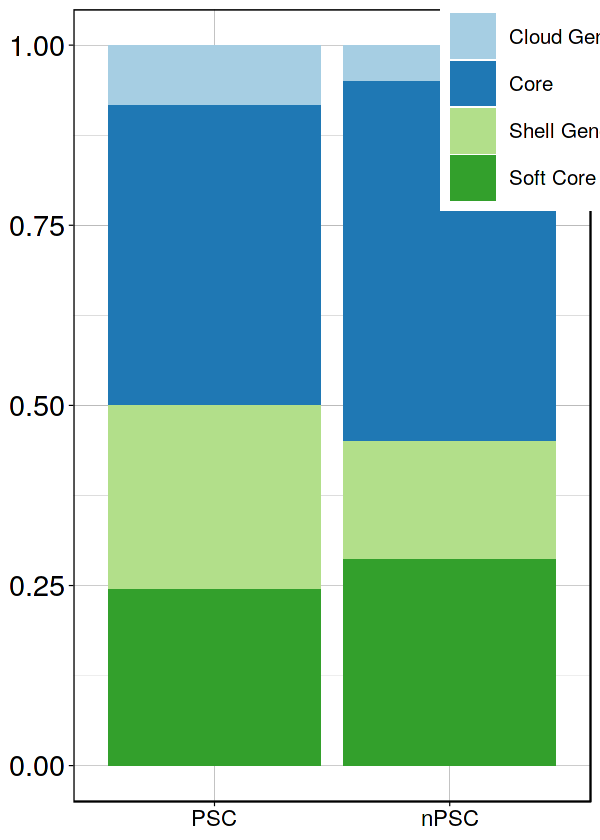

In [189]:
options(repr.plot.width=5, repr.plot.height=7)



Tpsc=15+75+44+46
Tnpsc=7+70+23+40

pipe_pan <- melt(t(rbind(df30,df10)))  %>% 
mutate(value=as.numeric(value)) %>% 
mutate(freqs = case_when(Var2 == 'PSC' ~ value/Tpsc,
                                          Var2 == 'nPSC' ~ value/Tnpsc))  
pipe_pan
ggplot(pipe_pan)+
aes(x=Var2,fill=Var1,y=freqs)+
geom_bar(stat="identity",position = "stack")+
scale_fill_brewer(palette = 'Paired',name='')+
theme_linedraw()+
theme(axis.title.x = element_blank(),
      axis.title.y = element_blank(),
     axis.text.x = element_text(size=13),
      axis.text.y = element_text(size=17))+
theme(legend.position = c(0.9,0.9),
     legend.key.size = unit(1, 'cm'),
    legend.title = element_text(size=15), #change legend title font size
    legend.text = element_text(size=12))



`summarise()` has grouped output by 'Pangenome'. You can override using the `.groups` argument.



	Pearson's Chi-squared test with Yates' continuity correction

data:  t(df2)
X-squared = 1.8834, df = 1, p-value = 0.1699


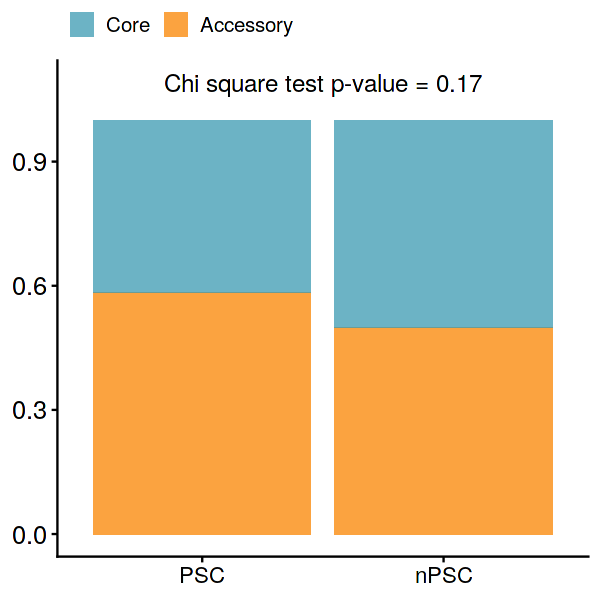

In [195]:
options(repr.plot.width=5, repr.plot.height=5)

pipe_pan2 <- rbind(pipe_pan  %>%  filter(Var1!='Core') %>% 
mutate(Pangenome='Accessory'),

pipe_pan %>%  filter(Var1=='Core') %>% 
mutate(Pangenome='Core'))

pipe_pan2n <- pipe_pan2 %>% group_by(Pangenome,Var2) %>% 
    summarise(n=sum(freqs))%>% 
mutate(Pangenome = factor(Pangenome, levels = c("Core", 'Accessory')))

core_acc_plot <- ggplot(data=pipe_pan2n)+
aes(x=Var2,fill=Pangenome,y=n)+
geom_bar(stat="identity",position = "stack")+
scale_fill_manual(values=alpha(c("#3B9AB2","#F98400"),0.75),name='')+
theme_cowplot()+
theme(axis.title.x = element_blank(),
      axis.title.y = element_blank(),
     axis.text.x = element_text(size=13),
      axis.text.y = element_text(size=15))+
theme(legend.position = 'top')

df2 <-  t(data.frame(rbind(c(75,(44+46+15)),
c(70,(7+23+40)))))
chisq.test(t(df2))

core_acc_plot <- core_acc_plot+annotate("text", x = 1.5, y = 1.09, label = "Chi square test p-value = 0.17",size=5)
core_acc_plot

In [ ]:
## Coding and non coding Regions

Region,pipe,n,freqs
<chr>,<chr>,<int>,<dbl>
Coding,nPSC,98,0.7
Coding,PSC,144,0.8
Non-Coding,nPSC,42,0.3
Non-Coding,PSC,36,0.2



	Pearson's Chi-squared test with Yates' continuity correction

data:  t(df2)
X-squared = 3.7468, df = 1, p-value = 0.05291


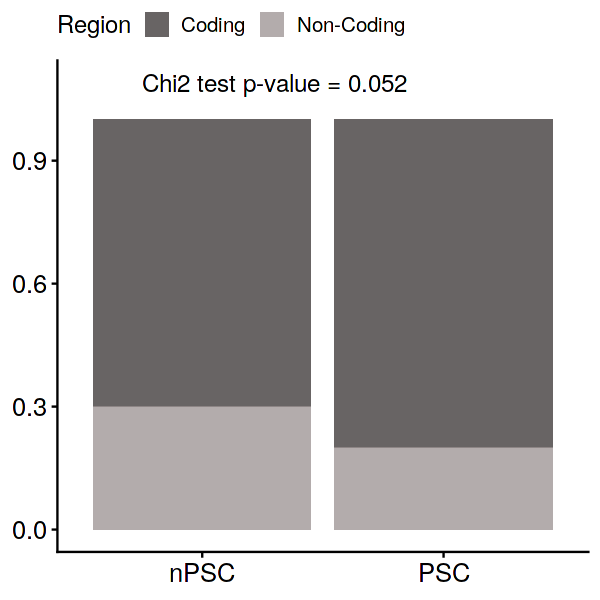

In [211]:
CNC <- (rbind(read.csv('fi10_mic_reg_pgnm_ed.csv') %>% select(Region) %>% 
mutate(pipe='nPSC'),
      read.csv('fi30_mic_reg_pgnm_ed.csv') %>% select(Region) %>% 
mutate(pipe='PSC'))) %>% group_by(Region,pipe) %>% 
tally() %>% 
mutate(freqs = case_when(pipe == 'PSC' ~ n/180,
                                          pipe == 'nPSC' ~ n/140)) 
CNC
df2 <-  t(data.frame(rbind(c(98,42),
c(144,36))))
chisq.test(t(df2))

CNC_plot <- CNC %>% ggplot()+
aes(x=pipe,y=freqs,fill=Region)+
geom_bar(stat  = 'identity')+
scale_fill_manual(values = alpha(c('#363131','#999090'),0.75)) +
theme_cowplot()+
theme(axis.title.x = element_blank(),
     axis.title.y = element_blank(),
      axis.text.x = element_text(size=15),
      axis.text.y = element_text(size=15),
     legend.position='top')
CNC_plot <- CNC_plot+annotate("text", x = 1.3, y = 1.09, label = "Chi2 test p-value = 0.052",size=5)
CNC_plot

In [ ]:
## Recombination
fi30_roary <- ((data_30) %>% select(roary_aln) %>% distinct())
write.csv(fi30_roary, 'f30_roary.csv',row.names=FALSE)
fi10_roary <- ((data_10) %>% select(roary_aln) %>% distinct())
write.csv(fi10_roary, 'f10_roary.csv',row.names=FALSE)
dim(fi30_roary )
dim(fi10_roary )

In [244]:
gr_phi <- read.table("f30_rb_results", sep=" ",header = FALSE)  %>% 
select(V1,V4) %>% 
mutate(V3 = case_when(V4 < 0.05 ~ "RB",
                              V4 >= 0.05  ~ "nRB",
                              V4 == NA  ~ "nd"))
colnames(gr_phi) <- c("Gene","phi_p","Recombinant")
table(gr_phi$Recombinant)
ng_phi <- read.table("f10_rb_results", sep=" ",header = FALSE) %>% 
select(V1,V4) %>% 
mutate(V3 = case_when(V4 < 0.05 ~ "RB",
                              V4 >= 0.05  ~ "nRB",
                              V4 == NA  ~ "nd"))
colnames(ng_phi) <- c("Gene","phi_p","Recombinant")
table(ng_phi$Recombinant)


nRB  RB 
 66  61 


nRB  RB 
 34  50 

In [256]:
dfr <- rbind(table(gr_phi$Recombinant),
table(ng_phi$Recombinant))
t(dfr)

chisq.test(t(dfr))

nRB,66,34
RB,61,50



	Pearson's Chi-squared test with Yates' continuity correction

data:  t(dfr)
X-squared = 2.2372, df = 1, p-value = 0.1347


Recombinant,n,freqs,pipe
<chr>,<int>,<dbl>,<chr>
nRB,34,0.4047619,nPSC
RB,50,0.5952381,nPSC
nRB,66,0.5196850,PSC
RB,61,0.4803150,PSC


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



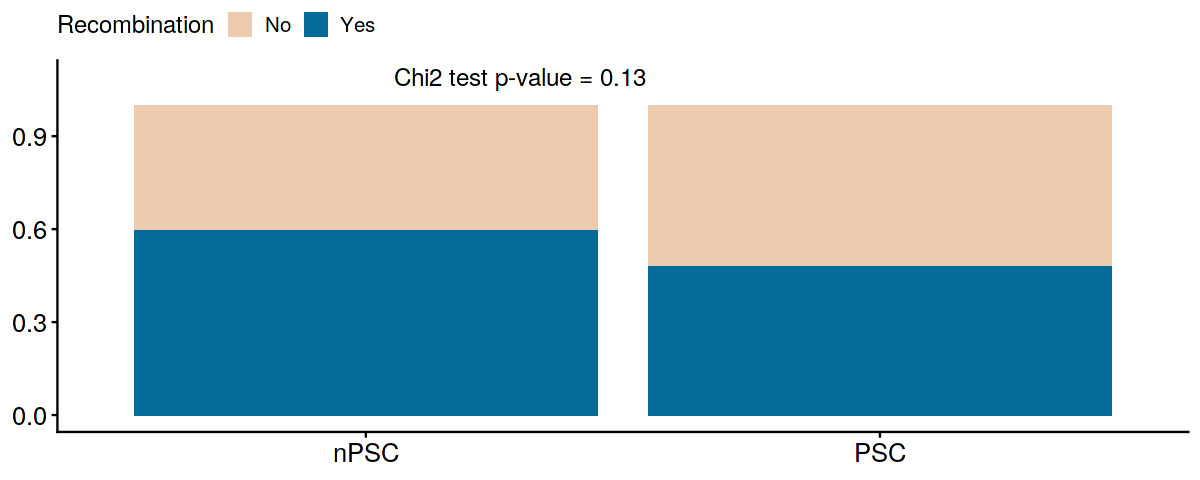

In [268]:
gr_rb <- merge(gr_phi,data_30 , by.x = 'Gene', by.y = 'roary_aln') %>% select(Gene,Recombinant) %>% 
distinct() %>% 
group_by(Recombinant) %>% 
tally() %>% 
mutate(freqs=n/127)  %>% 
mutate(pipe='PSC')
ng_rb <- merge(ng_phi,data_10 , by.x = 'Gene', by.y = 'roary_aln') %>% select(Gene,Recombinant) %>% 
distinct() %>% 
group_by(Recombinant) %>% 
tally() %>% 
mutate(freqs=n/84) %>% 
mutate(pipe='nPSC')

rbind(ng_rb,gr_rb)

rb_plot <- rbind(ng_rb,gr_rb) %>% 
ggplot()+
aes(x=pipe,y=freqs,fill=Recombinant)+
geom_bar(stat  = 'identity')+
scale_fill_manual(values = alpha(c('#363131','#999090'),0.75)) +
theme_cowplot()+
theme(axis.title.x = element_blank(),
     axis.title.y = element_blank(),
      axis.text.x = element_text(size=15),
      axis.text.y = element_text(size=15),
     legend.position='top')+
scale_fill_manual(values = wes_palette("Darjeeling2"),labels=c('No','Yes'),name='Recombination')

rb_plot <- rb_plot+annotate("text", x = 1.3, y = 1.09, label = "Chi2 test p-value = 0.13",size=5)
rb_plot

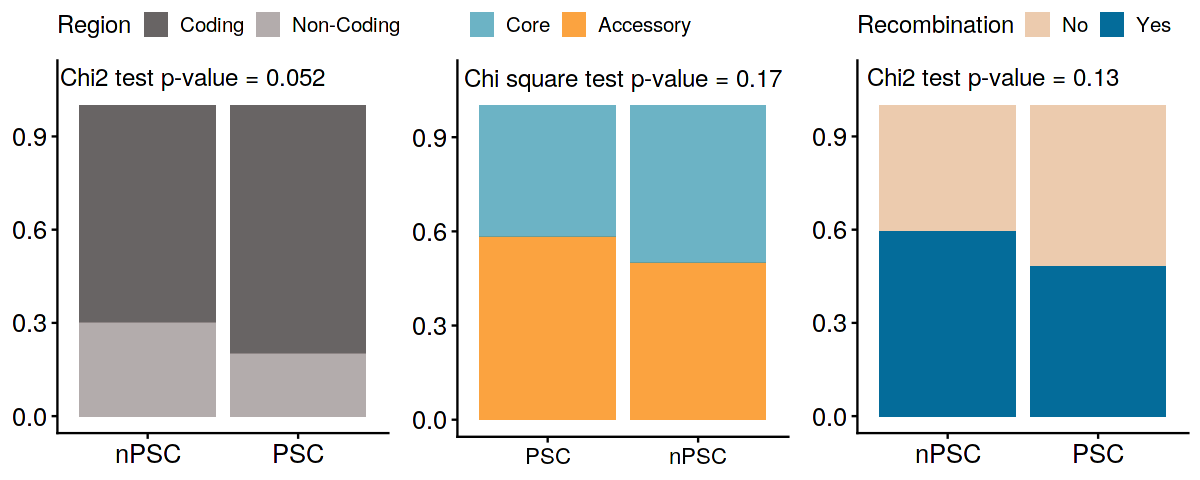

In [270]:
options(repr.plot.width=10, repr.plot.height=4)

plot_grid(CNC_plot,core_acc_plot,rb_plot,nrow=1)
ggsave('SupplFigure5.png', device = 'png',dpi = 400,width = 10,height = 4)

### Featuire Importance nPSC

,X,X0,Importance
,<int>,<chr>,<dbl>
1,11,51678,0.11392210
2,12,152657,0.09801118
3,10,103583,0.09104595
4,2,251983,0.08260844
5,13,208099,0.07625540
6,3,278843,0.07408872


[1] 14  1

Features,CorrGroup
<chr>,<int>
103583,1
152657,2
152665,3
196449,4
208099,5
224504,6
232366,7
251983,8
278843,9


[1] 62  3

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; usi

Features,CorrGroup
<int>,<int>
103583,1
1010557,1
152657,2
584114,2
152665,3
1122828,3
196449,4
1160689,4
208099,5


CorrGroup,X0,X,Importance,n
<int>,<chr>,<int>,<dbl>,<int>
1,103583,10,0.09104595,12
2,152657,12,0.09801118,4
3,152665,4,0.06687489,18
4,196449,8,0.05867139,2
5,208099,13,0.07625540,24
6,224504,5,0.07036251,6
7,232366,1,0.06251914,10
8,251983,2,0.08260844,4
9,278843,3,0.07408872,5


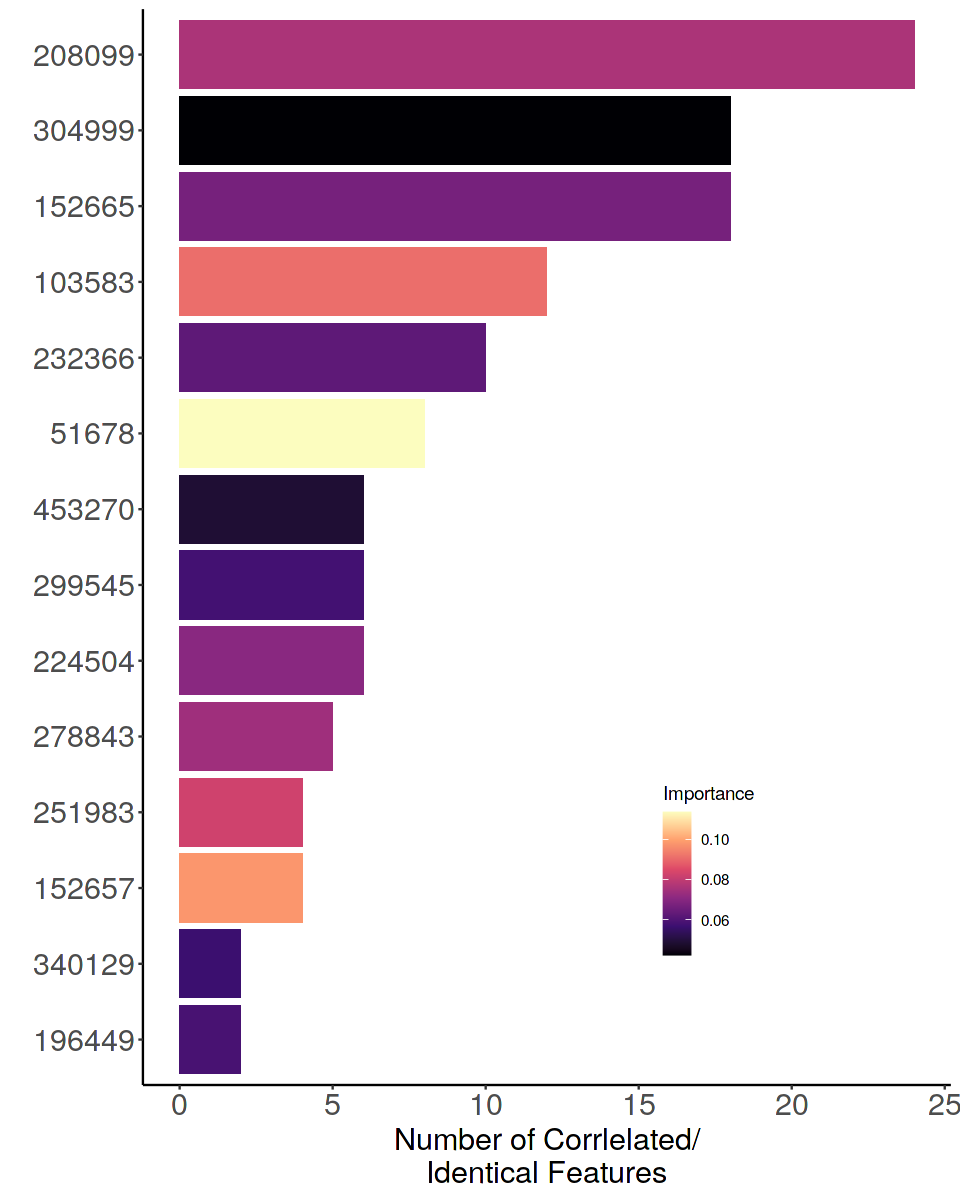

In [273]:
fi10 <- read.csv('FeatureImportance_10_2.csv')
fi10$X0 <- gsub('^X','',fi10$X0)
head(fi10)


f10_pairs <- read.csv('selected_pairs_fi10_2.csv')  %>% 
select(F,F2)
f10_pairs$F <- gsub('^X','',f10_pairs$F)
f10_pairs$F2 <- gsub('^X','',f10_pairs$F2)

f10_pairs <- f10_pairs[f10_pairs$F %in% fi10$X0,]

f <- f10_pairs %>% group_by(F) %>% 
tally() %>% 
select(F)
dim(f)
## Create corr groups
new <- c()
for (i in 1:14){
    c <- f10_pairs %>% filter(F==as.character(f[i,1])) %>% 
mutate(CorrGroup=i)
    new <- rbind(new,c)

}
# new
## Remove duplicates
F10_corr_group <- rbind(new  %>% select(F,CorrGroup) %>% 
rename(Features='F'),
new  %>% select(F2,CorrGroup) %>% 
rename(Features='F2')) %>% 
distinct()

F10_corr_group <- F10_corr_group  %>% filter(!is.na(Features))
F10_corr_group ##  a  data frame with features and the Corr group they belong to

## Load uniq to all tab

f10u2all <-  read.csv('/mnt/78cc8f10-85a5-4702-b307-bbcbc042e850/EarlyErad/FOLLOWUP/FILTERS/CorrMat/fi10Annot/feats_uniq2all.csv',
                      sep=',',header=TRUE)
dim(f10u2all)

## Add corr groups to uniq to all

new2 <- c()
for (i in 1:62){
    c <- melt(f10u2all %>% filter(X==F10_corr_group[i,1]))%>% 
filter(!is.na(value)) %>% 
mutate(CorrGroup=F10_corr_group[i,2]) %>% 
select(value,CorrGroup) %>% 
rename(Features='value')
     new2 <- rbind(new2,c)

}
new2

## Remove duplicates

Fall10_corr_group <- rbind(F10_corr_group,new2) %>% 
distinct()

fi10corr <- merge(fi10,Fall10_corr_group, by.x = 'X0', by.y = 'Features')


corr_n <- Fall10_corr_group %>% group_by(CorrGroup) %>% 
tally()
# corr_n
options(repr.plot.width = 8, repr.plot.height = 10)

fi10corr <- merge(fi10corr,corr_n, by='CorrGroup') 
fi10corr
plot_f10corr_imp <-  fi10corr %>% 
ggplot(aes(x=n,y=fct_reorder(X0,n),fill=Importance))+
geom_bar(stat = 'identity')+
scale_fill_viridis_c(option='A')+
theme_classic()+ylab('')+xlab('Number of Corrlelated/\nIdentical Features')+
theme(axis.text.x = element_text(size=18),
     axis.text.y = element_text(size=18),
      axis.title.x = element_text(size=18),
     legend.position=c(0.7,0.2))

plot_f10corr_imp

In [272]:
fi10corr %>% filter(X0=='208099')

CorrGroup,X0,X,Importance,n
<int>,<chr>,<int>,<dbl>,<int>
5,208099,13,0.0762554,24


### Feature Importance PSC

In [54]:
fi30 <- read.csv('FeatureImportance_30_2.csv')
fi30$X0 <- gsub('^X','',fi30$X0)
head(fi30)
dim(fi30)



f30_pairs <- read.csv('selected_pairs_fi30_2.csv')  %>% 
select(F,F2)
f30_pairs$F <- gsub('^X','',f30_pairs$F)
f30_pairs$F2 <- gsub('^X','',f30_pairs$F2)

f30_pairs <- f30_pairs[f30_pairs$F %in% fi30$X0,]

f <- f30_pairs %>% group_by(F) %>% 
tally() %>% 
select(F)
dim(f)
## Create corr groups
new <- c()
for (i in 1:30){
    c <- f30_pairs %>% filter(F==as.character(f[i,1])) %>% 
mutate(CorrGroup=i)
    new <- rbind(new,c)

}
# new
## Remove duplicates
F30_corr_group <- rbind(new  %>% select(F,CorrGroup) %>% 
rename(Features='F'),
new  %>% select(F2,CorrGroup) %>% 
rename(Features='F2')) %>% 
distinct()

F30_corr_group <- F30_corr_group  %>% filter(!is.na(Features))
F30_corr_group

## Load uniq to all tab

f30u2all <-  read.csv('/mnt/78cc8f10-85a5-4702-b307-bbcbc042e850/EarlyErad/FOLLOWUP/FILTERS/CorrMat/fi30Annot/feats_uniq2all.csv',
                      sep=',',header=TRUE)
# head(f30u2all)

## Add corr groups to uniq to all

new2 <- c()
for (i in 1:75){
    c <- melt(f30u2all %>% filter(X==F30_corr_group[i,1]))%>% 
filter(!is.na(value)) %>% 
mutate(CorrGroup=F30_corr_group[i,2]) %>% 
select(value,CorrGroup) %>% 
rename(Features='value')
     new2 <- rbind(new2,c)

}
# new2

## Remove duplicates

Fall30_corr_group <- rbind(F30_corr_group,new2) %>% 
distinct()
dim(Fall30_corr_group)

fi30corr <- merge(fi30,Fall30_corr_group, by.x = 'X0', by.y = 'Features')


corr_n <- Fall30_corr_group %>% group_by(CorrGroup) %>% 
tally()
# corr_n
options(repr.plot.width = 8, repr.plot.height = 10)

fi30corr <- merge(fi30corr,corr_n, by='CorrGroup') 
fi30corr
sum(fi30corr$n)
plot_f30corr_imp <- fi30corr %>% 
ggplot(aes(x=n,y=fct_reorder(X0,n),fill=Importance))+
geom_bar(stat = 'identity')+
scale_fill_viridis_c(option='A')+
theme_classic()+ylab('')+xlab('Number of Corrlelated/\nIdentical Features')+
theme(axis.text.x = element_text(size=18),
     axis.text.y = element_text(size=18),
      axis.title.x = element_text(size=18),
     legend.position=c(0.7,0.2))

,X,X0,Importance
,<int>,<chr>,<dbl>
1,7,208742,0.06605152
2,23,209512,0.05973770
3,19,208741,0.04409006
4,5,351970,0.04207958
5,12,240188,0.03882531
6,21,374872,0.03732713


[1] 30  3

[1] 30  1

Features,CorrGroup
<chr>,<int>
117545,1
130453,2
169110,3
208099,4
208489,5
208741,6
208742,7
208820,8
209512,9


No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; usi

[1] 170   2

CorrGroup,X0,X,Importance,n
<int>,<chr>,<int>,<dbl>,<int>
1,117545,10,0.03280852,30
2,130453,3,0.03601027,6
3,169110,8,0.03706590,2
4,208099,29,0.03098763,24
5,208489,22,0.03056046,18
6,208741,19,0.04409006,4
7,208742,7,0.06605152,2
8,208820,17,0.03565632,4
9,209512,23,0.05973770,10


[1] 170

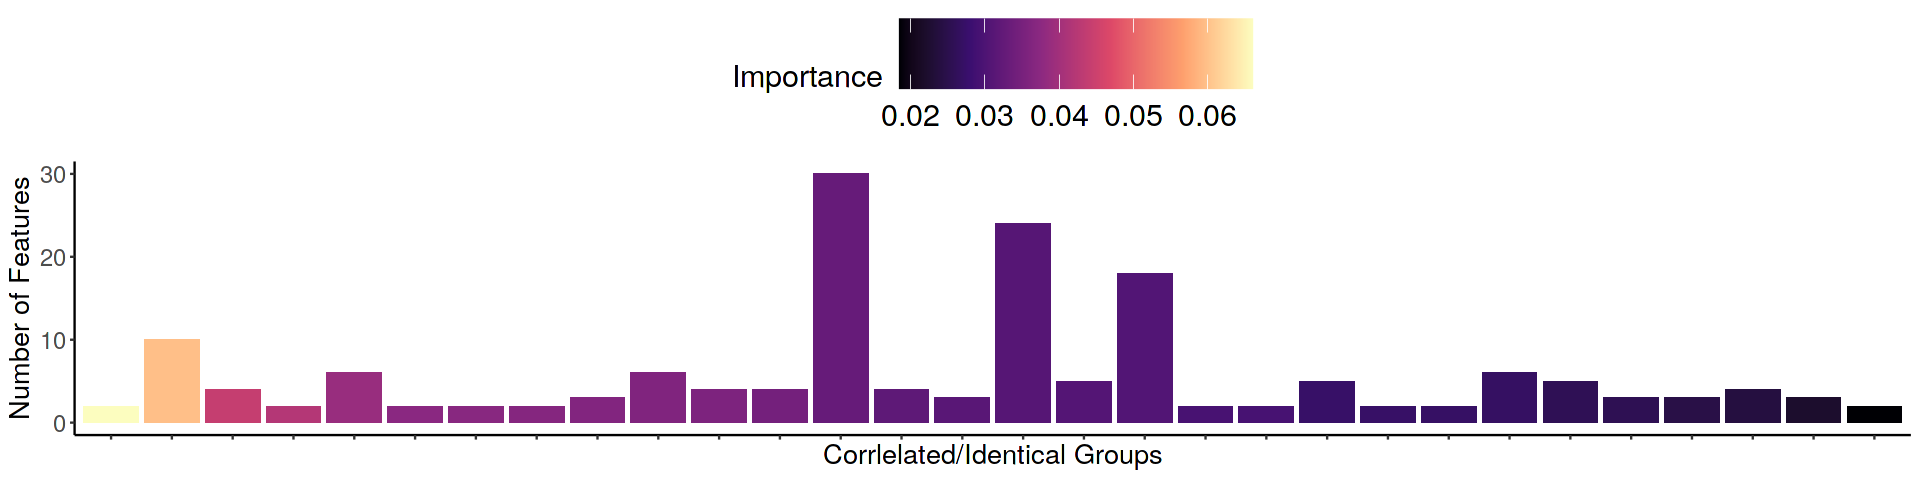

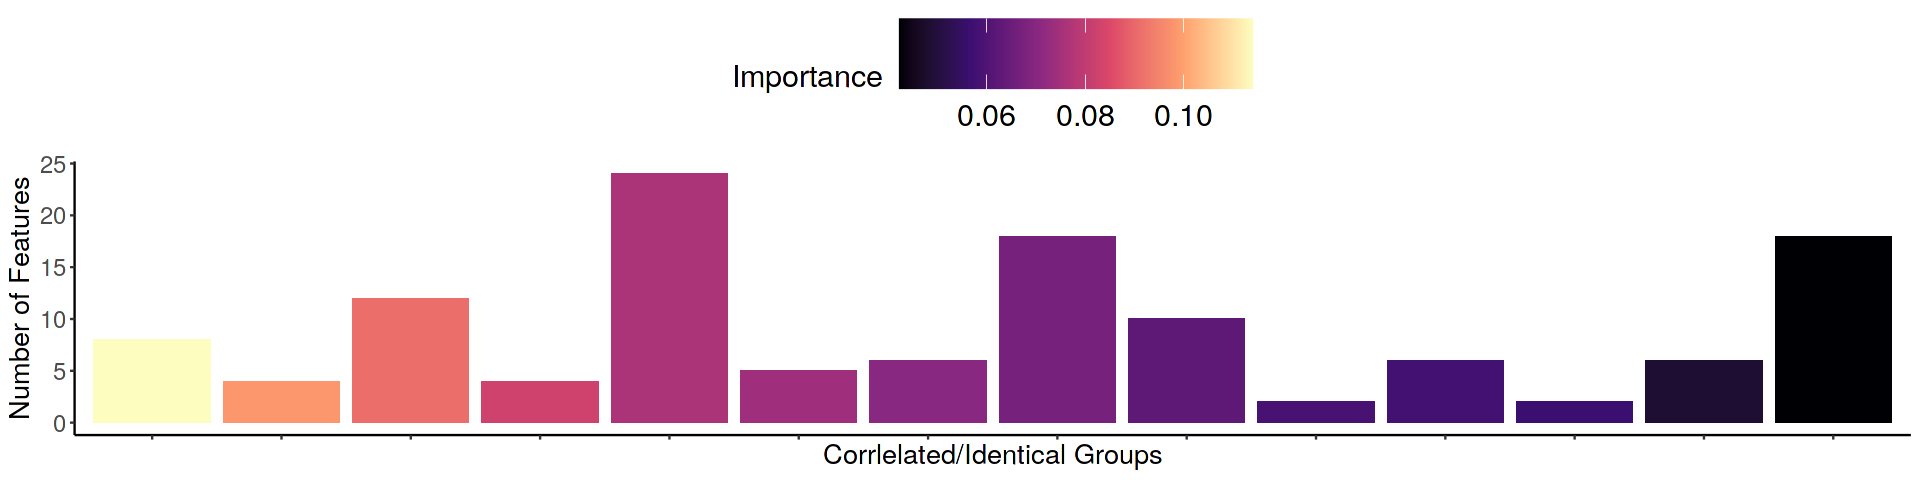

In [158]:
options(repr.plot.width = 16, repr.plot.height = 4)

f30_imp_plot <- fi30corr %>% 
ggplot(aes(y=n,x=fct_reorder(X0,Importance,.desc = TRUE),fill=Importance))+
geom_bar(stat = 'identity')+
scale_fill_viridis_c(option='A')+
theme_classic()+ylab('Number of Features')+xlab('Corrlelated/Identical Groups')+
theme(legend.key.size = unit(1.5, 'cm') ,
      legend.text=element_text(size=18),
      legend.title=element_text(size=18),
#        legend.title=element_blank(),
      axis.text.x = element_blank(),
     axis.text.y = element_text(size=14),
      axis.title.x = element_text(size=16),
      axis.title.y = element_text(size=16),
     legend.position='top',
     legend.direction='horizontal')
f30_imp_plot 
f10_imp_plot <- fi10corr %>% 
ggplot(aes(y=n,x=fct_reorder(X0,Importance,.desc = TRUE),fill=Importance))+
geom_bar(stat = 'identity')+
scale_fill_viridis_c(option='A')+
theme_classic()+ylab('Number of Features')+xlab('Corrlelated/Identical Groups')+
theme(legend.key.size = unit(1.5, 'cm') ,
      legend.text=element_text(size=18),
      legend.title=element_text(size=18),
#        legend.title=element_blank(),
      axis.text.x = element_blank(),
     axis.text.y = element_text(size=14),
      axis.title.x = element_text(size=16),
      axis.title.y = element_text(size=16),
     legend.position='top',
     legend.direction='horizontal')
f10_imp_plot

In [142]:
f10leg <- get_legend(f10_imp_plot)
f30leg <- get_legend(f30_imp_plot)

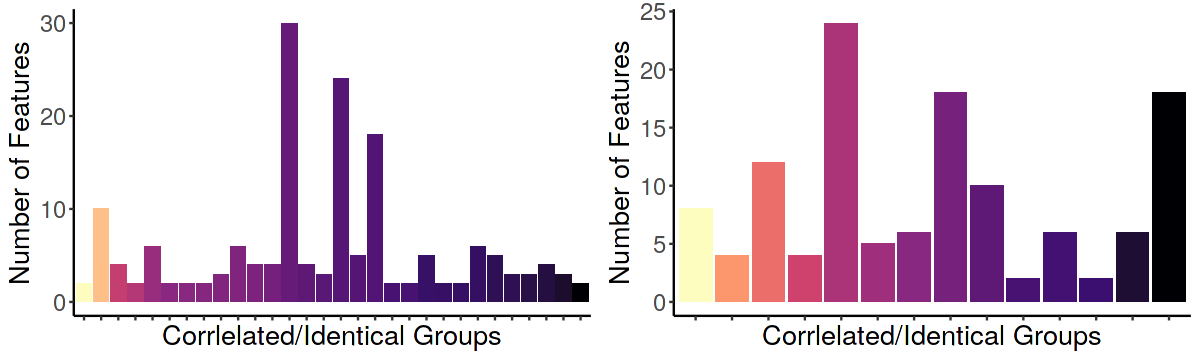

In [144]:
options(repr.plot.width=10, repr.plot.height=3)

plot_grid(f30_imp_plot+theme(legend.position='none'),
          f10_imp_plot+theme(legend.position='none'))
ggsave('Imp_plots.png', device = 'png', dpi = 450, width = 10,height = 4)

In [59]:
### Load kmer pres/abs
gkmerpa <- read.csv('../Figure8/PSCfeats_kmerpa.csv', 
                   row.names = 1)
ngkmerpa <- read.csv('../Figure8/nPSCfeats_kmerpa.csv', 
                   row.names = 1)

## load metadata
mdata <- read.csv("../Figure8/CompleteDatabase.csv")[,-1]

mdata <- mdata  %>% mutate(AETdiff=str_replace(AETdiff,'0','E')) %>% 
mutate(AETdiff=str_replace(AETdiff,'1','F')) %>% 
mutate(AETdiff=str_replace(AETdiff,'2','PF'))  

mdata$AETdiff <- as.factor(mdata$AETdiff)
dim(mdata)
baps <- read.csv("../Figure8/hierBAPS.txt")[,-1]
head(baps)
baps1 <- baps  %>% select(Isolate,level.1) %>% 
 column_to_rownames('Isolate')


[1] 504   6

,Isolate,level.1,level.2
,<chr>,<int>,<int>
1,PA10,1,1
2,PA1012,2,3
3,PA1013,2,3
4,PA1014,2,3
5,PA1015,2,3
6,PA1019,3,6


In [61]:
# gkmerpa
f30kpa <- gkmerpa[row.names(gkmerpa) %in% fi30$X0,]
colSums(t(f30kpa))
tf30kpa <- data.frame(t(f30kpa))
head(tf30kpa)
# Ngkmerpa
f10kpa <- ngkmerpa[row.names(ngkmerpa) %in% fi10$X0,]
colSums(t(f10kpa))
tf10kpa <- data.frame(t(f10kpa))


aet_tf30kpa <- merge(tf30kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
select(!Patient) %>% 
select(!Sequencing) %>% 
column_to_rownames('Row.names')


daet_tf30kpa <- merge(tf30kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AET) %>% 
select(!Patient) %>% 
select(!Sequencing) %>% 
column_to_rownames('Row.names')

data.frame(cor(aet_tf30kpa)) %>% select(AET)

117545 130453 169110 208099 208489 208741 208742 208820 209512 230134 235350 
   110    103    105    105    190    221    186    223    276    105    152 
238539 240188 250881 264037 264661 283169 296750 297371 298289 302880 317121 
   229    176    289    212    163    266    100    125    248    320    225 
317810 323635 351906 351970 352087 374872 386981  54535 
   334    191    253    197    191    287    420    128

,X117545,X130453,X169110,X208099,X208489,X208741,X208742,X208820,X209512,X230134,⋯,X302880,X317121,X317810,X323635,X351906,X351970,X352087,X374872,X386981,X54535
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
PA1013,0,0,0,1,0,0,0,1,0,0,⋯,1,0,1,0,1,1,1,0,1,0
PA1014,0,0,0,1,0,0,0,0,0,0,⋯,1,0,0,0,1,0,1,0,1,0
PA1015,0,0,0,0,0,1,0,0,0,0,⋯,1,0,1,0,1,1,0,0,1,0
PA1019,0,1,0,0,0,1,0,0,0,0,⋯,0,1,1,0,1,1,0,0,1,0
PA1020,0,0,0,1,0,0,0,0,0,0,⋯,0,1,1,0,1,1,1,0,1,0
PA1021,1,0,0,0,1,0,0,1,1,0,⋯,1,0,1,1,1,1,0,1,1,0


103583 152657 152665 196449 208099 224504 232366 251983 278843 299545 304999 
    63    133    149    289    105    231    272    363    153    255    350 
340129 453270  51678 
   328    362    135

,AET
,<dbl>
X117545,-0.2212583
X130453,-0.1795696
X169110,-0.2475305
X208099,0.3803913
X208489,0.1917700
X208741,0.2364828
X208742,0.1877726
X208820,0.1963034
X209512,0.2034825


In [63]:

daet_features_count <- data.frame(apply(daet_tf30kpa,2,as.factor) )   %>% 
pivot_longer(!AETdiff, names_to = "Features", values_to = "count") %>% 
mutate(count=as.numeric(count)) %>% 
group_by(Features,AETdiff) %>% 
tally()
daet_features <- data.frame(apply(daet_tf30kpa,2,as.factor) )   %>% 
pivot_longer(!AETdiff, names_to = "Features", values_to = "count") 
# daet_features

aet_features_count <- data.frame(apply(aet_tf30kpa,2,as.factor) )   %>% 
pivot_longer(!AET, names_to = "Features", values_to = "count") %>% 
mutate(count=as.numeric(count)) %>% 
group_by(Features,AET) %>% 
tally()
aet_features <- data.frame(apply(aet_tf30kpa,2,as.factor) )   %>% 
pivot_longer(!AET, names_to = "Features", values_to = "count") 
aet_features <- aet_features %>% mutate(AET=case_when(
                        AET == '0'~'E',
                        AET == '1'~'F' ))

fi30x <- fi30
fi30x$X0 <- gsub('^','X',fi30x$X0)

aet_features_imp <- merge(aet_features, fi30x[,-1], by.x = 'Features', by.y = 'X0', all.x = TRUE)
daet_features_imp <- merge(daet_features, fi30x[,-1], by.x = 'Features', by.y = 'X0', all.x = TRUE)

In [65]:
aet_tf10kpa <- merge(tf10kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AETdiff) %>% 
select(!Patient) %>% 
select(!Sequencing) %>% 
column_to_rownames('Row.names')


daet_tf10kpa <- merge(tf10kpa, mdata , by.x = 'row.names',by.y='Isolate') %>% 
select(!Date) %>% 
select(!AET) %>% 
select(!Patient) %>% 
select(!Sequencing) %>% 
column_to_rownames('Row.names')

daet_features10_count <- data.frame(apply(daet_tf10kpa,2,as.factor) )   %>% 
pivot_longer(!AETdiff, names_to = "Features", values_to = "count") %>% 
mutate(count=as.numeric(count)) %>% 
group_by(Features,AETdiff) %>% 
tally()
daet_features10 <- data.frame(apply(daet_tf10kpa,2,as.factor) )   %>% 
pivot_longer(!AETdiff, names_to = "Features", values_to = "count") 
# daet_features

aet_features10_count <- data.frame(apply(aet_tf10kpa,2,as.factor) )   %>% 
pivot_longer(!AET, names_to = "Features", values_to = "count") %>% 
mutate(count=as.numeric(count)) %>% 
group_by(Features,AET) %>% 
tally()
aet_features10 <- data.frame(apply(aet_tf10kpa,2,as.factor) )   %>% 
pivot_longer(!AET, names_to = "Features", values_to = "count") 
aet_features10 <- aet_features10 %>% mutate(AET=case_when(
                        AET == '0'~'E',
                        AET == '1'~'F' ))


fi10x <- fi10
fi10x$X0 <- gsub('^','X',fi10x$X0)

aet_features10_imp <- merge(aet_features10, fi10x[,-1], by.x = 'Features', by.y = 'X0', all.x = TRUE)
daet_features10_imp <- merge(daet_features10, fi10x[,-1], by.x = 'Features', by.y = 'X0', all.x = TRUE)

In [123]:
f10_imp_plot <- fi10corr %>% 
ggplot(aes(y=n,x=fct_reorder(X0,Importance,.desc = TRUE),fill=Importance))+
geom_bar(stat = 'identity')+
scale_fill_viridis_c(option='A')+
theme_classic()+ylab('Number of Features')+xlab('Corrlelated/Identical Groups')+
theme(axis.text.x = element_blank(),
     axis.text.y = element_text(size=12),
      axis.title.x = element_text(size=13),
      axis.title.y = element_text(size=13),
     legend.position=c(0.15,0.8))


f10kpa_corr <- data.frame(cor(aet_tf10kpa)) %>% select(AET) 


tile <- merge(aet_features10_imp,f10kpa_corr, by.x = 'Features',by.y = 'row.names', all.y = TRUE)[-1,] %>% 
select(Features,AET.y,Importance) %>% 
distinct() %>% 
arrange(desc(Importance))
tile_plot <- ggplot(tile)+
aes(x=fct_reorder(Features,Importance,.desc=TRUE),y=1,fill=AET.y)+
geom_tile()+
# scale_fill_brewer(palette = "YlGnBu")+
theme(axis.text.x = element_blank(),
     axis.text.y = element_text(size=9,color='white'),
      axis.ticks = element_blank(),
#        axis.text.y = element_blank(),
      axis.title.x = element_blank(),
      axis.title.y = element_text(size=13,color='white'),
     legend.position='none',
     legend.direction='horizontal')

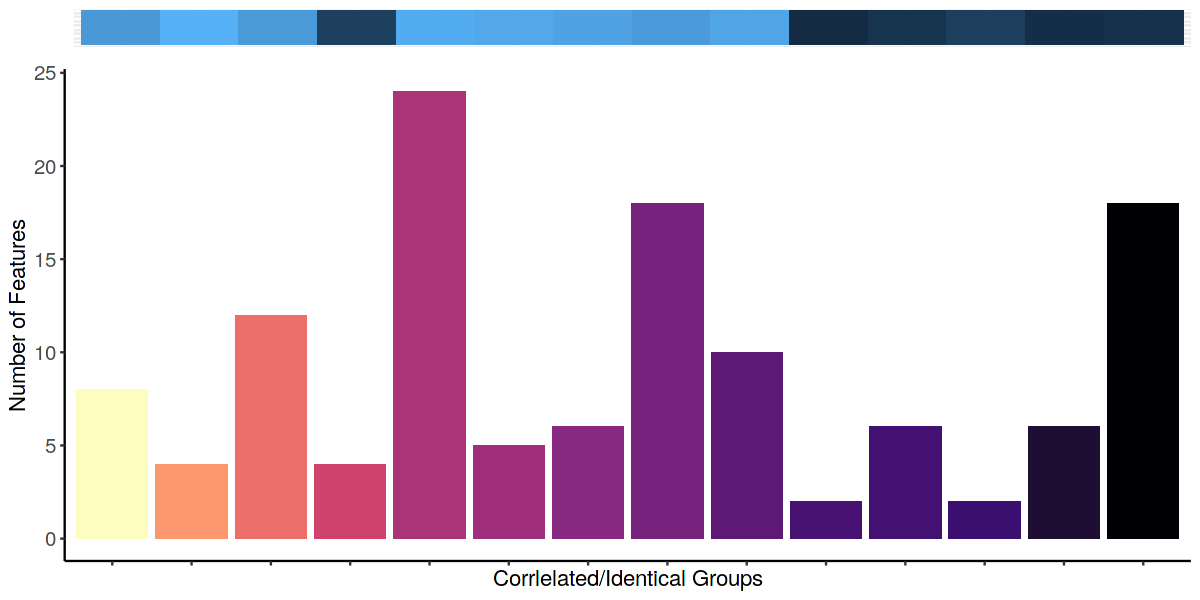

In [125]:
library(RColorBrewer)
options(repr.plot.width=10, repr.plot.height=5)

plot_grid(tile_plot,
          f10_imp_plot+theme(legend.position='none'),
          nrow=2,rel_heights = c(0.1,0.9))
